In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model

In [39]:
def draw_line(coef,intercept, mi, ma,colour):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1],color=colour)

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ration between positive and negative is 100 : 2, in the 2nd data its 100:20, in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

In [6]:
print(enumerate(ratios))

-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: 0.098000, T: 102, Avg. loss: 0.953424
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2, Bias: 0.196000, T: 204, Avg. loss: 0.859267
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2, Bias: 0.294000, T: 306, Avg. loss: 0.765110
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2, Bias: 0.392000, T: 408, Avg. loss: 0.670953
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2, Bias: 0.490000, T: 510, Avg. loss: 0.576796
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2, Bias: 0.588000, T: 612, Avg. loss: 0.482639
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 2, Bias: 0.686000, T: 714, Avg. loss: 0.388482
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 2, Bias: 0.784000, T: 816, Avg. loss: 0.294325
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.00, NNZs: 2, Bias: 0.882000, T: 918, Avg. loss: 0.200168
Total training time: 0.00 seconds.
-

Total training time: 0.02 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 2, Bias: 0.100000, T: 900, Avg. loss: 0.985327
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 0.09, NNZs: 2, Bias: 0.120000, T: 1080, Avg. loss: 0.981953
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 0.10, NNZs: 2, Bias: 0.140000, T: 1260, Avg. loss: 0.978580
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 0.12, NNZs: 2, Bias: 0.160000, T: 1440, Avg. loss: 0.975206
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.13, NNZs: 2, Bias: 0.180000, T: 1620, Avg. loss: 0.971833
Total training time: 0.02 seconds.
-- Epoch 10
Norm: 0.14, NNZs: 2, Bias: 0.200000, T: 1800, Avg. loss: 0.968459
Total training time: 0.02 seconds.
-- Epoch 11
Norm: 0.16, NNZs: 2, Bias: 0.220000, T: 1980, Avg. loss: 0.965085
Total training time: 0.02 seconds.
-- Epoch 12
Norm: 0.17, NNZs: 2, Bias: 0.240000, T: 2160, Avg. loss: 0.961712
Total training time: 0.02 seconds.
-- Epoch 13
Norm: 0.19, NNZs: 2, Bias: 0.260000, T: 2340, Avg. loss

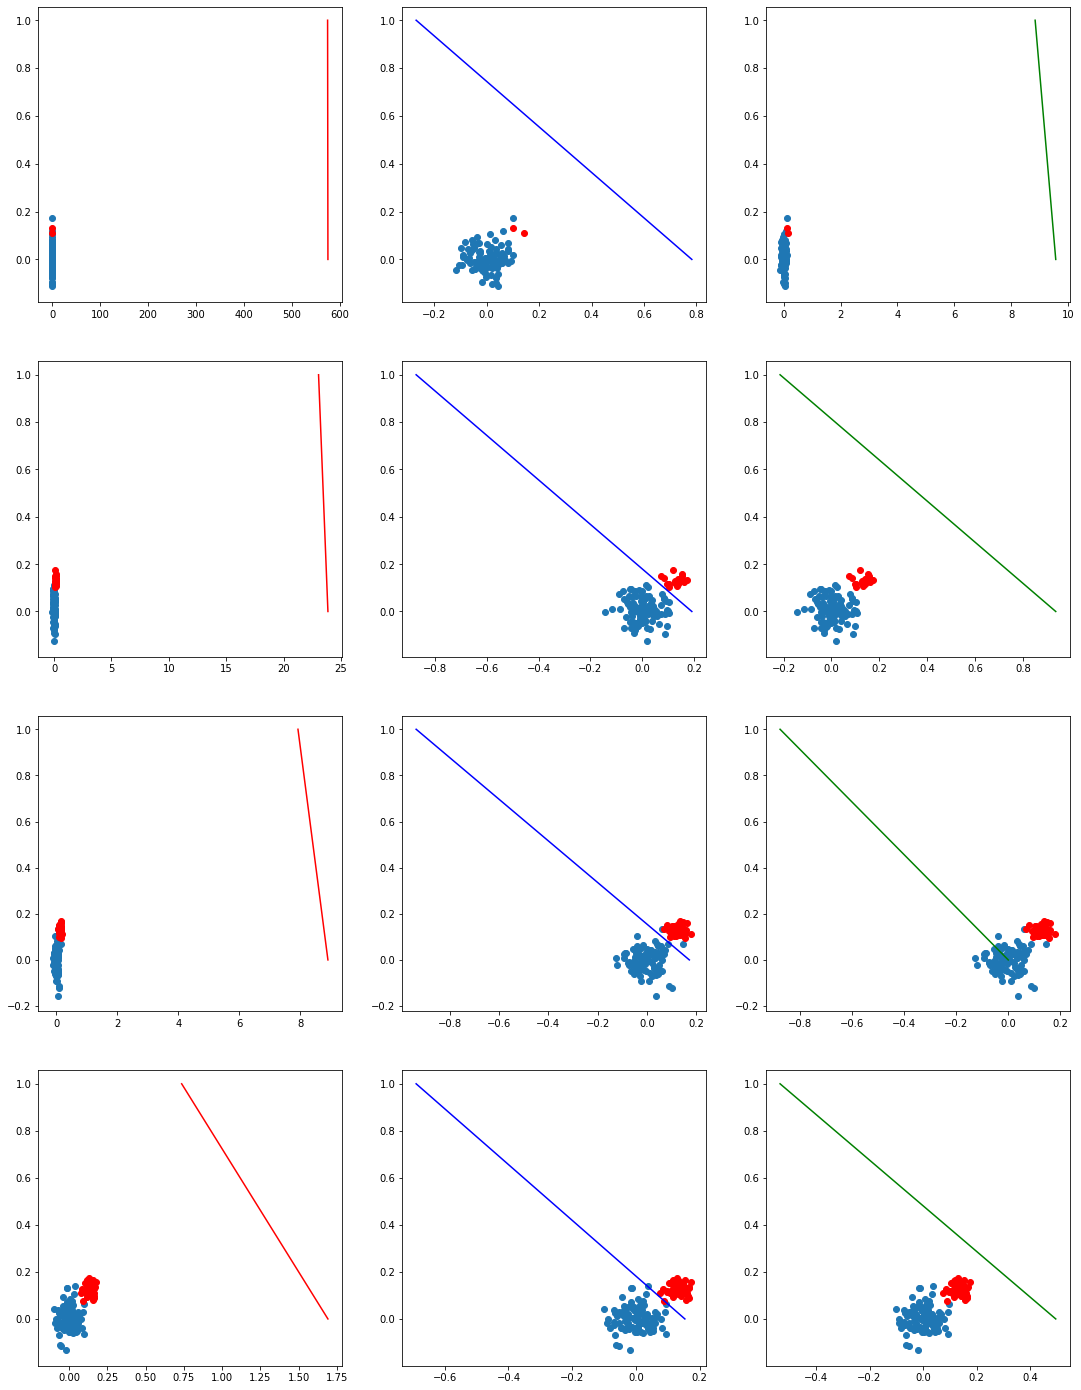

In [47]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
learning_rate=[0.001,1,100]
colors=['red','blue','green']
plt.figure(figsize=(25,25))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for i in range(len(learning_rate)):
        plt.subplot(4, 4, ((4*j)+i+1))
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf = linear_model.SGDClassifier(eta0=learning_rate[i], alpha=0.0001, loss='hinge', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
        clf.fit(X=X, y=y)
        draw_line(clf.coef_[0],clf.intercept_, 0, 1,colors[i])
plt.show()

-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: 0.048403, T: 102, Avg. loss: 0.681690
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 2, Bias: 0.095586, T: 204, Avg. loss: 0.659298
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 2, Bias: 0.141581, T: 306, Avg. loss: 0.638019
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 2, Bias: 0.186408, T: 408, Avg. loss: 0.617798
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 2, Bias: 0.230121, T: 510, Avg. loss: 0.598578
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 2, Bias: 0.272767, T: 612, Avg. loss: 0.580297
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 2, Bias: 0.314345, T: 714, Avg. loss: 0.562914
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 2, Bias: 0.354889, T: 816, Avg. loss: 0.546381
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 2, Bias: 0.394459, T: 918, Avg. loss: 0.530645
Total training time: 0.00 seconds.
-

Norm: 262.96, NNZs: 2, Bias: 66.196939, T: 1080, Avg. loss: 9.130269
Total training time: 0.02 seconds.
-- Epoch 10
Norm: 255.87, NNZs: 2, Bias: 66.203864, T: 1200, Avg. loss: 9.016729
Total training time: 0.02 seconds.
-- Epoch 11
Norm: 225.32, NNZs: 2, Bias: 66.204803, T: 1320, Avg. loss: 7.980774
Total training time: 0.02 seconds.
-- Epoch 12
Norm: 196.74, NNZs: 2, Bias: 33.501178, T: 1440, Avg. loss: 6.982423
Total training time: 0.02 seconds.
Convergence after 12 epochs took 0.02 seconds
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: 0.029477, T: 140, Avg. loss: 0.690089
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 2, Bias: 0.057912, T: 280, Avg. loss: 0.684006
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 2, Bias: 0.085444, T: 420, Avg. loss: 0.678318
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 2, Bias: 0.111974, T: 560, Avg. loss: 0.673003
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 2, Bias: 0.137502, T: 700, Av

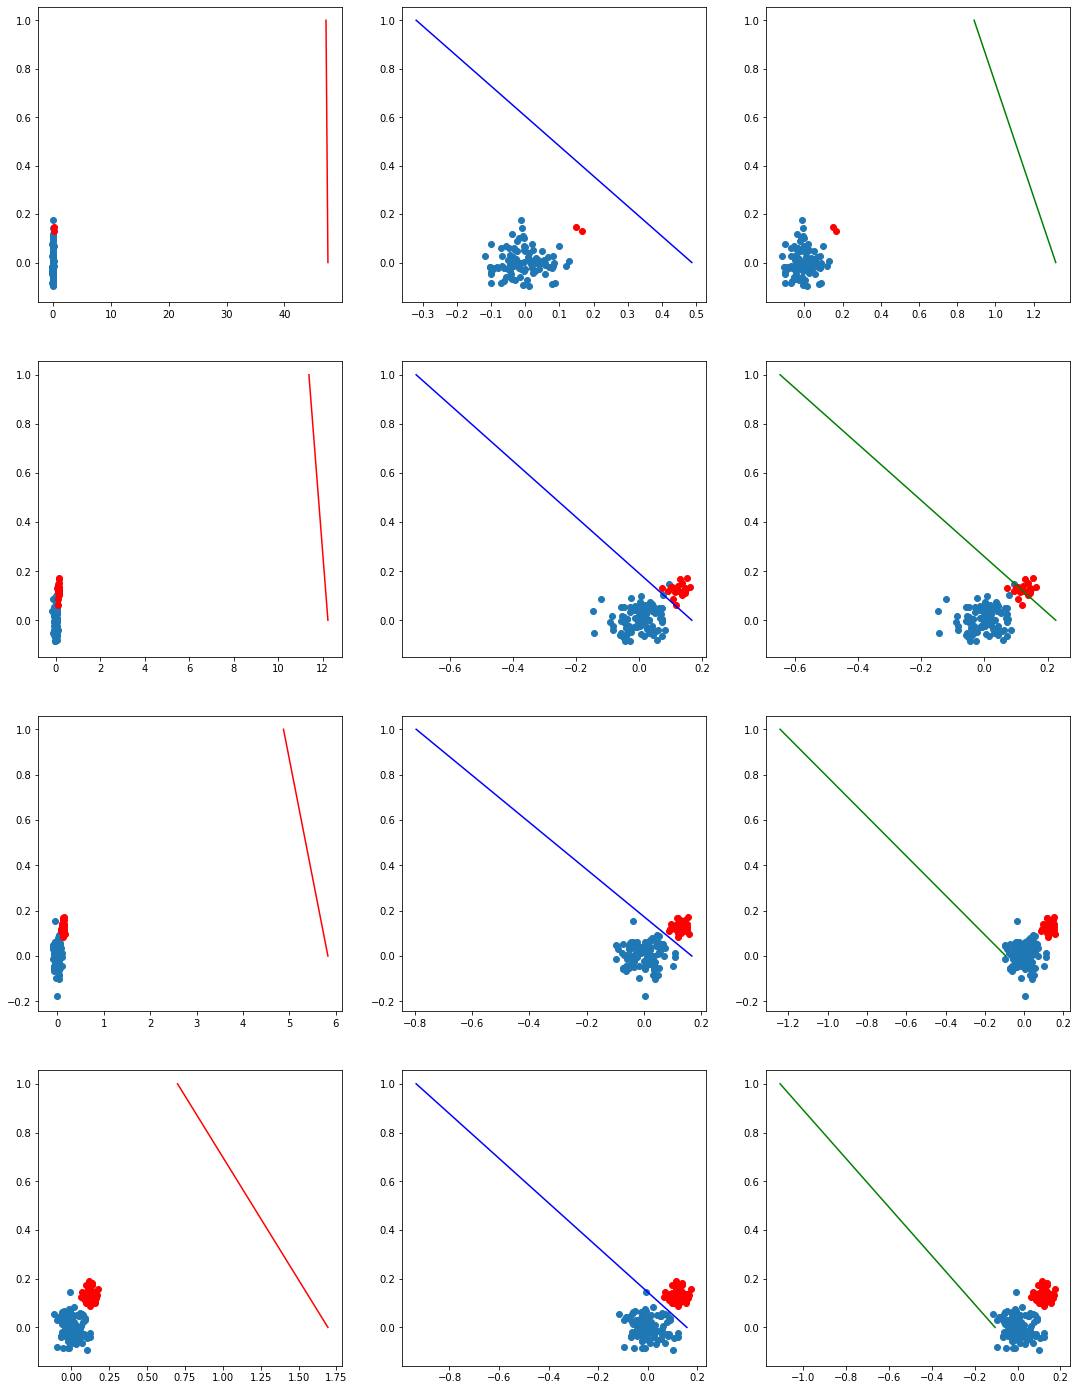

In [49]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
learning_rate=[0.001,1,100]
colors=['red','blue','green']
plt.figure(figsize=(25,25))
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    for i in range(len(learning_rate)):
        plt.subplot(4, 4, ((4*j)+i+1))
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        clf = linear_model.SGDClassifier(eta0=learning_rate[i], alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
        clf.fit(X=X, y=y)
        draw_line(clf.coef_[0],clf.intercept_, 0, 1,colors[i])
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different learning rates [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and         jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper and atach the picture, or record a video upload it in assignment. 
</pre>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [0]:
#you can start writing code here.